In [25]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tkinter
matplotlib.use('TkAgg')
%matplotlib inline


## Financial Trading with bt

#### The bt process
The bt package provides a flexible framework for defining and backtesting trading strategies in Python. A trading strategy is a method of buying and selling financial assets based on predefined rules. Backtesting is a way to assess the effectiveness of a strategy by testing it on historical data.

* Get the historical price data, either using ```bt.get()``` or loading data from existing CSV files.
* Define the strategy with ```bt.Strategy()``` and pass in the strategy name and the ```algos``` needed.
* Create a backtest with ```bt.Backtest()``` , pass in the strategy and data, and run the backtest.
* Plot and evaluate the backtest result to assess the strategy's viability.

### Define and backtest a simple strategy
You want to create a strategy to trade the so-called "FAANG" stocks, which is an acronym referring to the stocks of the five most popular and best-performing American technology companies: Facebook, Amazon, Apple, Netflix, and Alphabet (a.k.a. Google).

The idea is simple, you will hold an equal amount of each stock in your portfolio. Every week the strategy will buy or sell shares as needed in order to balance the equal weights.

First, you will use the bt package to download the historical price data for the "FAANG" stocks by their tickers. Second, you will define the strategy, which specifies buying an equal amount of each stock, and rebalance every week. Lastly, you will run the backtest and plot the result.

In [26]:
import bt

In [27]:
stock_list = 'fb, amzn, goog, nflx, aapl' # CSV List
start_date = '2020-6-1' # June 1 st 2020
end_date = '2020-12-1' # Dec 1 st 2020

In [28]:
bt_data = bt.get(stock_list, start = start_date, end = end_date)
bt_data.head()

,fb,amzn,goog,nflx,aapl
Date,,,,,
2020-06-01,231.910004,2471.040039,1431.819946,425.920013,79.469933
2020-06-02,232.720001,2472.409912,1439.219971,427.309998,79.837837
2020-06-03,230.160004,2478.399902,1436.380005,421.970001,80.277344
2020-06-04,226.289993,2460.600098,1412.180054,414.329987,79.585991
2020-06-05,230.770004,2483.000000,1438.390015,419.600006,81.852669


In [29]:
### BT Strategy
bt_strategy = bt.Strategy('Trade_Weekly',
                          [
                              bt.algos.RunWeekly(),
                              bt.algos.SelectAll(),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()
                          ])

In [30]:
bt_backtest = bt.Backtest(bt_strategy, bt_data)

In [31]:
bt_res = bt.run(bt_backtest)

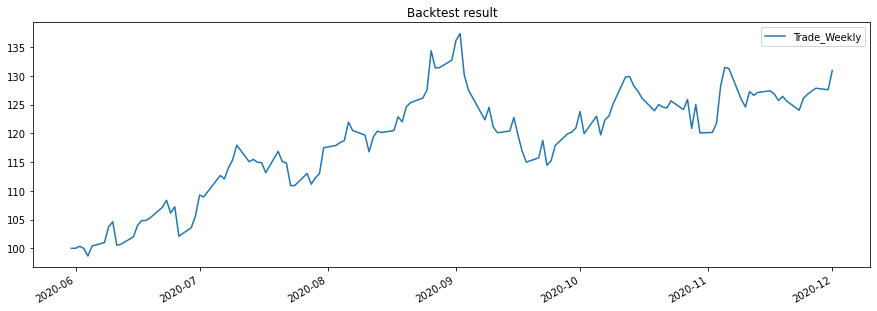

In [32]:
bt_res.plot(title="Backtest result")
plt.show()

In [33]:
# Get trade details
bt_res.get_transactions()

price  quantity
Date       Security                       
2020-06-01 aapl        79.469933    2516.0
           amzn      2471.040039      80.0
           fb         231.910004     862.0
           goog      1431.819946     139.0
           nflx       425.920013     469.0
...                          ...       ...
2020-11-23 goog      1734.859985      -1.0
           nflx       476.619995     -11.0
2020-11-30 aapl       117.996651     -36.0
           fb         276.970001      -3.0
           goog      1760.739990       2.0

[125 rows x 2 columns]